In [138]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
path = os.getcwd()

In [140]:
df = pd.read_csv(r'covid19_merged.csv')

In [141]:
df.shape

(173, 65)

## Data Cleaning

In [142]:
df.columns

Index(['Unnamed: 0', 'country', 'covid_confirmed_4_2_20',
       'covid_deaths_4_2_20', 'covid_recovered_4_2_20', 'covid19_first_date',
       'Flu_pneumonia_death_rate_per_100000', 'h1n1_Geographic_spread',
       'h1n1_Intensity', 'h1n1_Impact_on_healthcare_services',
       'h1n1_Cases_underestimate', 'h1n1_Cases_confirmed',
       'h1n1_Deaths_confirmed', 'first_school_closure_date', 'code_2digit_x',
       'code_3digit_x', 'jan_temp', 'feb_temp', 'mar_temp', 'apr_temp',
       'may_temp', 'jun_temp', 'july_temp', 'aug_temp', 'sept_temp',
       'oct_temp', 'nov_temp', 'dec_temp', 'annual_temp', 'Jan_precip',
       'Feb_precip', 'Mar_precip', 'Apr_precip', 'May_precip', 'Jun_precip',
       'July_precip', 'Aug_precip', 'Sept_precip', 'Oct_precip', 'Nov_precip',
       'Dec_precip', 'Annual_precip', 'airport_traffic_2018_thousands',
       'property_Affordability_Index', 'Health_Care_Index',
       'hosp_beds_per_1000_2017', 'ICU-CCB_beds_per_100000', 'Population_2020',
       'Den

### Not Useful Columns Yet

In [143]:
columns_to_drop = ['Unnamed: 0', 'country', 'code_3digit_x', 'code_2digit_x', 'covid19_first_date', 'first_school_closure_date', 'latitude', 'longitude']
df.drop(columns=columns_to_drop, inplace=True)

In [144]:
from pandas.api.types import is_numeric_dtype
columns = df.columns
no_numeric = [c for c in columns if not is_numeric_dtype(df[c])]
no_numeric

['h1n1_Geographic_spread',
 'h1n1_Intensity',
 'h1n1_Impact_on_healthcare_services',
 'Density_KM2m',
 'Fertility_rate',
 'Median_age',
 'Urban_pop_pct',
 'sex_male_to_female_total']

In [145]:
# Making Ordinal Categorical variables Numerical and Handling NaN miss imputed values
columns_with_nan = ['Median_age', 'Density_KM2m', 'Urban_pop_pct', 'sex_male_to_female_total', 'Fertility_rate']
df['Density_KM2m'] = df['Density_KM2m'].apply(lambda x: str(x).replace(',', ''))
df['Urban_pop_pct'] = df['Urban_pop_pct'].apply(lambda x: str(x).replace('%', ''))

for x in columns_with_nan:
    df[x] = df[x].replace('N.A.', np.nan)
    df[x] = df[x].replace('nan', np.nan)
    df[x] = df[x].replace('-', np.nan)
    df[x] = df[x].apply(pd.to_numeric)

In [146]:
def ordinal_transformation(row):
    if row.h1n1_Intensity == '***':
        row.h1n1_Intensity = 3
    elif row.h1n1_Intensity == '**':
        row.h1n1_Intensity = 2
    elif row.h1n1_Intensity == '*':
        row.h1n1_Intensity = 1

    if row.h1n1_Impact_on_healthcare_services == 'mod':
        row.h1n1_Impact_on_healthcare_services = 3
    elif row.h1n1_Impact_on_healthcare_services == 'low2':
        row.h1n1_Impact_on_healthcare_services = 2
    elif row.h1n1_Impact_on_healthcare_services == 'low':
        row.h1n1_Impact_on_healthcare_services = 1

    return row

In [147]:
df = df.apply(lambda x: ordinal_transformation(x), axis=1)

In [148]:
df.columns

Index(['covid_confirmed_4_2_20', 'covid_deaths_4_2_20',
       'covid_recovered_4_2_20', 'Flu_pneumonia_death_rate_per_100000',
       'h1n1_Geographic_spread', 'h1n1_Intensity',
       'h1n1_Impact_on_healthcare_services', 'h1n1_Cases_underestimate',
       'h1n1_Cases_confirmed', 'h1n1_Deaths_confirmed', 'jan_temp', 'feb_temp',
       'mar_temp', 'apr_temp', 'may_temp', 'jun_temp', 'july_temp', 'aug_temp',
       'sept_temp', 'oct_temp', 'nov_temp', 'dec_temp', 'annual_temp',
       'Jan_precip', 'Feb_precip', 'Mar_precip', 'Apr_precip', 'May_precip',
       'Jun_precip', 'July_precip', 'Aug_precip', 'Sept_precip', 'Oct_precip',
       'Nov_precip', 'Dec_precip', 'Annual_precip',
       'airport_traffic_2018_thousands', 'property_Affordability_Index',
       'Health_Care_Index', 'hosp_beds_per_1000_2017',
       'ICU-CCB_beds_per_100000', 'Population_2020', 'Density_KM2m',
       'Fertility_rate', 'Median_age', 'Urban_pop_pct', 'gdp_usd_million',
       'age_0_to_14_years_percent', '

### Missing Values

In [149]:
missing_values = df.isnull().sum()
missing_values[missing_values.values > 0].sort_values(ascending=False)

ICU-CCB_beds_per_100000                          137
hosp_beds_per_1000_2017                          136
h1n1_Intensity                                   103
h1n1_Impact_on_healthcare_services               103
Health_Care_Index                                 84
h1n1_Geographic_spread                            81
property_Affordability_Index                      75
airport_traffic_2018_thousands                    45
sept_temp                                         19
Oct_precip                                        19
Sept_precip                                       19
Aug_precip                                        19
May_precip                                        19
Jun_precip                                        19
Dec_precip                                        19
Apr_precip                                        19
Mar_precip                                        19
Feb_precip                                        19
Jan_precip                                    

## Data Analysis

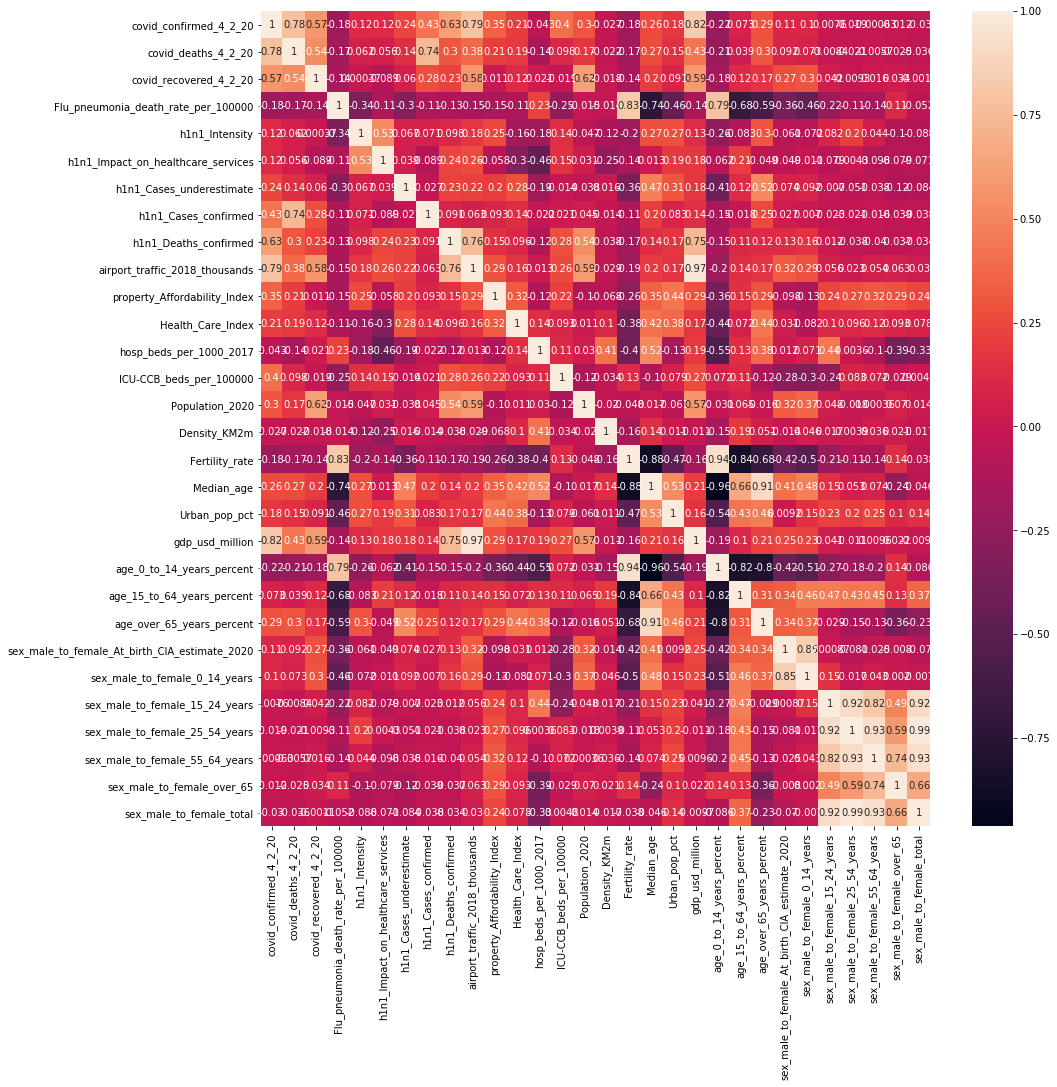

In [150]:
no_weather_columns = [x for x in list(df.columns) if 'temp' not in x and 'precip' not in x]
corr = df[no_weather_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

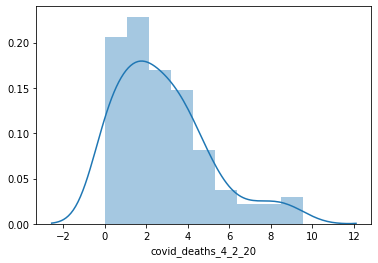

In [151]:
ax = sns.distplot(np.log(df[df['covid_deaths_4_2_20']>0]['covid_deaths_4_2_20']));
plt.show()

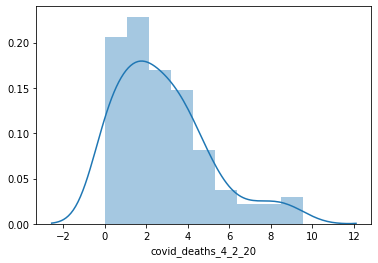

In [152]:
ax = sns.distplot(np.log(df[df['covid_deaths_4_2_20']>0]['covid_deaths_4_2_20']));
plt.show()

In [193]:
df_train = df[df['ICU-CCB_beds_per_100000'].notna()]

## Machine Learning Initial Model

In [194]:
df_train.reset_index(drop=True, inplace=True)

In [195]:
df_train.ix[4, 'h1n1_Geographic_spread'] = 'R'

In [196]:
df_train.drop(columns=['covid_recovered_4_2_20'], inplace=True)


In [197]:
df_train.fillna(0, inplace=True)

In [198]:
from sklearn.model_selection import train_test_split
X_df = df_train.drop('covid_deaths_4_2_20', axis=1).copy()
Y_df = df_train['covid_deaths_4_2_20'].copy()
X_train_or, X_test_or, Y_train_or, Y_test_or = train_test_split(
    X_df, Y_df, test_size=0.2, random_state=5000)

In [199]:
X_train = X_train_or.copy()
X_test = X_test_or.copy()
Y_train = Y_train_or.copy()
Y_test = Y_test_or.copy()

In [200]:
from sklearn.preprocessing import (PowerTransformer, StandardScaler, 
                                   MinMaxScaler, LabelEncoder, OneHotEncoder)

In [201]:
le_h1n1_Geographic_spread = LabelEncoder()
le_h1n1_Geographic_spread.fit(X_train['h1n1_Geographic_spread'])
X_train['h1n1_Geographic_spread'] = le_h1n1_Geographic_spread.transform(X_train['h1n1_Geographic_spread'])

In [202]:
ohe_h1n1_Geographic_spread = OneHotEncoder()
ohe_h1n1_Geographic_spread.fit(X_train["h1n1_Geographic_spread"].values[:,None])
out = ohe_h1n1_Geographic_spread.transform(X_train["h1n1_Geographic_spread"].values[:,None]) 
out_array = out.toarray()
ohe_cols_op = []
for category in ohe_h1n1_Geographic_spread.categories_[0]:
    current_class = le_h1n1_Geographic_spread.classes_[int(category)]
    print(current_class)
    col_add = "op_" + current_class
    ohe_cols_op.append(col_add)
    X_train[col_add] = out_array[:,int(category)]

X_train = X_train.drop("h1n1_Geographic_spread", axis =1)

L
N
R
S
W


In [203]:
X_test['h1n1_Geographic_spread'] = le_h1n1_Geographic_spread.transform(X_test['h1n1_Geographic_spread'])

temp_test = ohe_h1n1_Geographic_spread.transform(X_test["h1n1_Geographic_spread"].values[:,None]).toarray()
for idx, col in enumerate(ohe_cols_op):
    X_test[col] = temp_test[:,idx]

X_test = X_test.drop("h1n1_Geographic_spread", axis=1)

In [204]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

regressor = regressor.fit(X_train, Y_train)

In [205]:
Y_test_estimate = regressor.predict(X_test)

In [206]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
rmse = mean_squared_error(Y_test, Y_test_estimate)
print("Root Mean Square Error (RMSE)= {:.2f}".format(rmse))
mae = mean_absolute_error(Y_test, Y_test_estimate)
print("Mean Absolute Error (MAE)= {:.2f}".format(mae))
r2 = r2_score(Y_test, Y_test_estimate)
print("R^2 = {:.3f}".format(r2))

Root Mean Square Error (RMSE)= 68779.38
Mean Absolute Error (MAE)= 171.88
R^2 = 0.623


In [207]:
importances = regressor.feature_importances_

In [229]:
importance = zip(X_train.columns, regressor.feature_importances_)


In [230]:
cases = list(importance)

In [237]:
for x in cases:
    name, y = x

    if y > 0:
        print(name, y)

covid_confirmed_4_2_20 0.8639886955604568
jan_temp 0.020913919335892088
jun_temp 7.838444670677906e-06
sept_temp 1.1581260509261926e-06
oct_temp 0.0002520273309085629
dec_temp 2.1415052716829997e-07
Aug_precip 2.403304291146308e-06
Sept_precip 2.6233439578117342e-08
airport_traffic_2018_thousands 2.0521766900970875e-05
property_Affordability_Index 0.011442393106501495
Density_KM2m 0.00036296265774492405
Urban_pop_pct 0.020435564075775958
age_over_65_years_percent 0.08246557808355964
sex_male_to_female_0_14_years 3.75834175180375e-06
sex_male_to_female_15_24_years 7.709418978058975e-08
sex_male_to_female_25_54_years 1.6061289537622863e-09
sex_male_to_female_55_64_years 0.00010283508314621992
sex_male_to_female_total 2.569806326019658e-08
